# Patience Signal
You need to be confident and patient for the US economy to recover.
- Created: 2021-10-04
- Updated: 2021-10-04

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import *

from src.utils.jupyter import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from src.execution.signals.patience import *
from src.execution.portfolio import Portfolio

In [4]:
notional = 10000

## Individual ticker performance

In [10]:
# Change this and rerun the following cells
TICKER = 'TQQQ'
THRESHOLD = -0.2

In [11]:
self = Patience(TICKER, THRESHOLD)

In [12]:
await self.backtest(notional)

[2021-10-04 23:45:28.222] [INFO] [signal:fetch:47] Fetching Patience(TQQQ)


In [13]:
self.yearly_stats()

/Users/allisonwang/dev/crypto_bot/src/analytics/performance.py:32: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(self.ANNUAL) * data.mean() / data.std()


,Sharpe,Sortino,Win,Max,Min,Return,Count
Year,,,,,,,
2010,0.8412,0.9297,0.5254,0.1491,-0.1116,0.2929,224
2011,1.1177,1.3011,0.5466,0.1370,-0.1757,0.6510,252
2012,1.7404,2.1832,0.5638,0.0977,-0.0786,0.7782,250
2013,1.1094,0.9388,0.5432,0.0933,-0.0608,0.2592,252
2014,2.9332,2.5824,0.6667,0.0782,-0.0483,0.6887,252
2015,0.7540,0.6890,0.5385,0.1443,-0.1185,0.2427,252
2016,0.5157,0.5387,0.5519,0.0957,-0.1224,0.1382,252
2017,NaN,NaN,NaN,0.0000,0.0000,0.0000,251
2018,0.5379,0.5629,0.5556,0.1815,-0.1360,0.1535,251


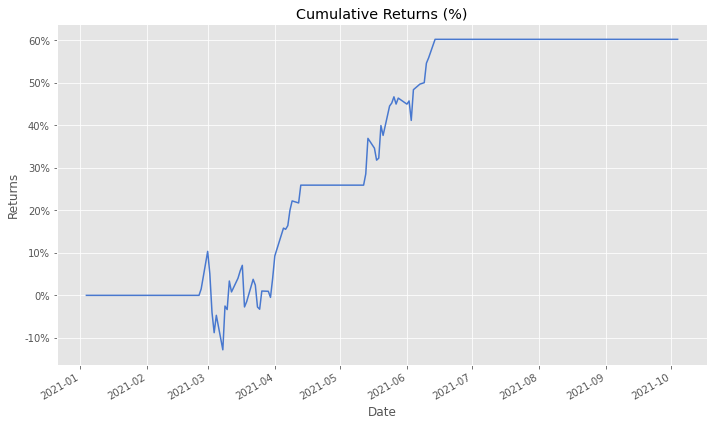

In [14]:
self.cumulative_returns()

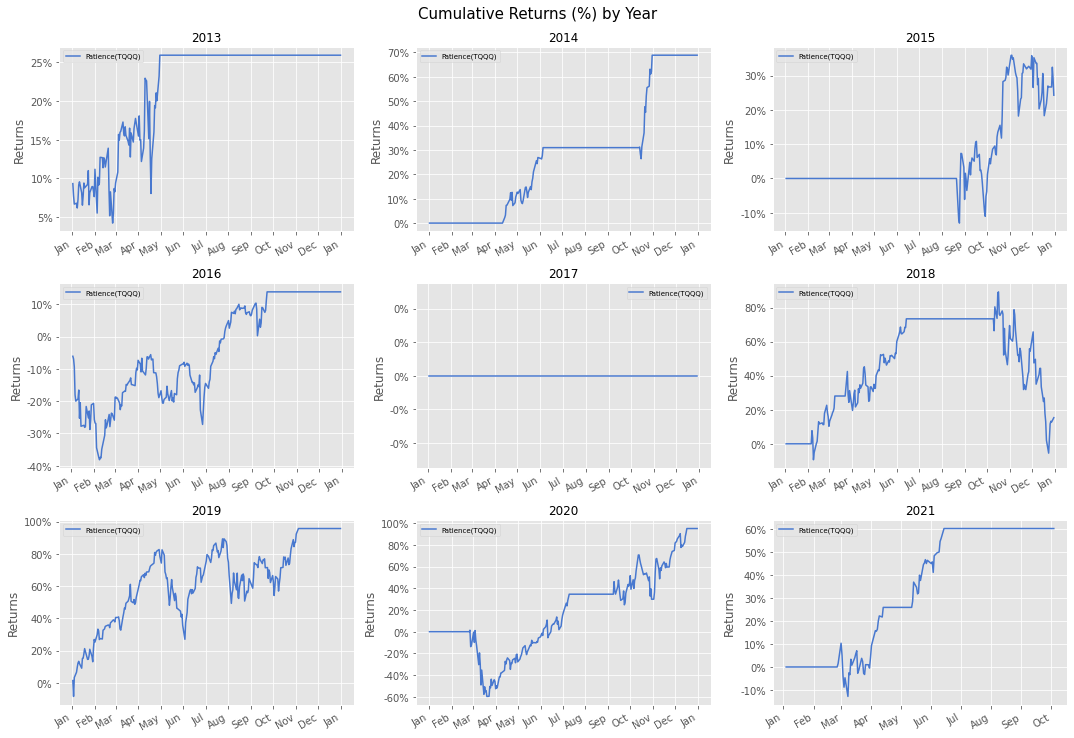

In [15]:
self.cumulative_returns(yearly=True)

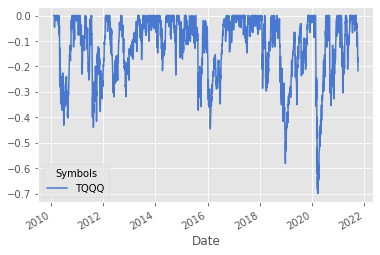

In [17]:
self.plot_signal()

/Users/allisonwang/dev/crypto_bot/src/analytics/performance.py:32: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(self.ANNUAL) * data.mean() / data.std()
/Users/allisonwang/dev/crypto_bot/src/analytics/performance.py:32: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(self.ANNUAL) * data.mean() / data.std()
/Users/allisonwang/dev/crypto_bot/src/analytics/performance.py:32: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(self.ANNUAL) * data.mean() / data.std()
/Users/allisonwang/dev/crypto_bot/src/analytics/performance.py:32: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(self.ANNUAL) * data.mean() / data.std()


,-0.05,-0.1,-0.15,-0.2,-0.25,-0.3
Year,,,,,,
2010,0.575600,0.850000,0.841200,0.841200,1.026400,1.316900
2011,0.386000,0.506500,0.688100,1.117700,0.759700,0.627900
2012,1.018600,1.137300,1.450400,1.740400,2.386400,2.677800
2013,2.433900,2.172700,1.949400,1.109400,1.109400,1.109400
2014,1.354600,1.712200,2.268700,2.933200,nan,nan
2015,0.890300,1.238200,0.620100,0.754000,0.754000,1.116000
2016,0.800600,0.780400,0.515700,0.515700,0.515700,0.515700
2017,2.565200,0.924900,nan,nan,nan,nan
2018,0.069200,0.334900,0.396100,0.537900,0.846100,-0.461100


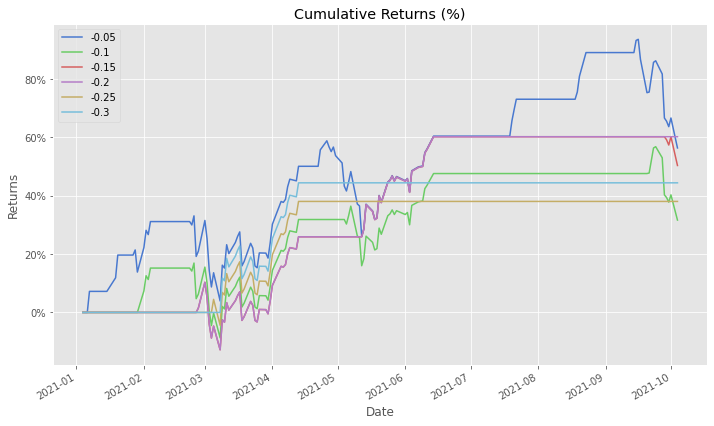

In [19]:
await self.show_performance(notional)

## Lots of Patience (Portfolio)

In [20]:
p = Portfolio([
    Patience('TQQQ', -0.2),
    Patience('UDOW', -0.1),
    Patience('SPXL', -0.1)
])

In [21]:
await p.backtest(notional * 3)

[2021-10-04 23:47:46.649] [INFO] [portfolio:update:54] Updating Patience(TQQQ)
[2021-10-04 23:47:46.655] [INFO] [portfolio:update:54] Updating Patience(UDOW)
[2021-10-04 23:47:46.660] [INFO] [portfolio:update:54] Updating Patience(SPXL)
[2021-10-04 23:47:46.667] [INFO] [portfolio:run_benchmark:73] Running portfolio benchmark: Signal(name=SPY)
[2021-10-04 23:47:46.668] [INFO] [signal:fetch:47] Fetching SPY


In [22]:
p.yearly_stats()

,Sharpe,Sortino,Win,Max,Min,Return,Count
Year,,,,,,,
2010,1.0034,1.2043,0.5747,0.1329,-0.1081,0.3693,224
2011,0.5266,0.6013,0.5538,0.1313,-0.1780,0.1428,252
2012,1.7718,2.4547,0.5450,0.0796,-0.0742,0.6872,250
2013,2.8373,4.0884,0.6104,0.0788,-0.0276,0.5176,252
2014,3.2959,3.6963,0.6328,0.0584,-0.0434,0.7325,252
2015,0.7321,0.9286,0.5072,0.1264,-0.1169,0.2353,252
2016,0.8717,0.9077,0.5736,0.0775,-0.1110,0.2841,252
2017,NaN,NaN,NaN,0.0000,0.0000,0.0000,251
2018,-0.0059,-0.0071,0.5351,0.1569,-0.1169,-0.1236,251


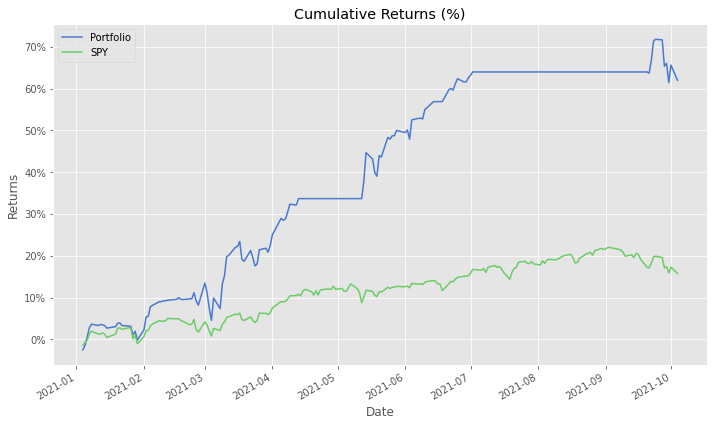

In [23]:
p.cumulative_returns()

/Users/allisonwang/dev/crypto_bot/src/execution/plotting.py:50: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data = [Statistics.cumulative_returns(returns[str(year)], notional=notional).mul(multiplier) for year in years]


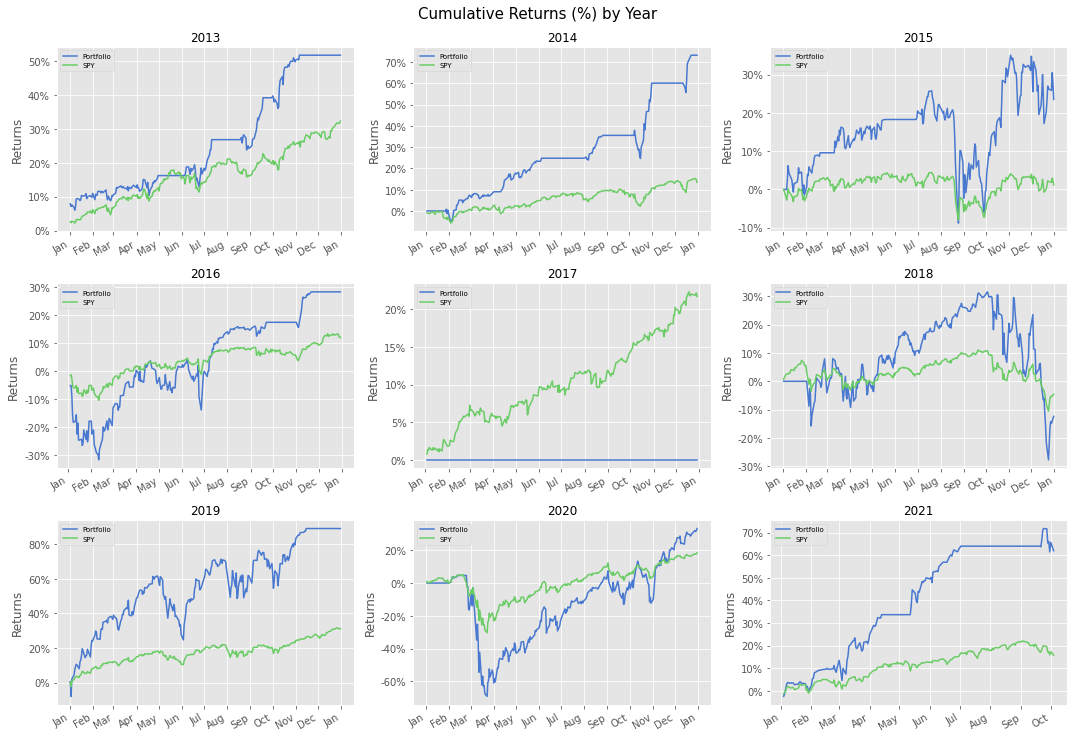

In [24]:
p.cumulative_returns(yearly=True)